# Simple Linear Regression

In [ ]:
import warnings
warnings.filterwarnings("ignore")

import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

import scipy.stats as stats

import sklearn.metrics as metrics

from statsmodels.graphics.gofplots import qqplot

np.random.seed(42)

In [ ]:
#@title Dataset generation (keep hidden until later)
beta_0 = 40_000
beta_1 = 2_500
sigma = 6_000
x = np.random.randint(low=0, high=20, size=(100))
noise = np.random.randn(100) * sigma
y = beta_0 + beta_1 * x + noise
y = np.round(y, decimals=2)

In [ ]:
print("First 5 values of x: %s" % (x[:5]))
print("First 5 values of y: %s" % (y[:5]))

First 5 values of x: [ 6 19 14 10  7]
First 5 values of y: [59875.15 95637.44 74567.94 71021.2  59669.82]


Visualize the relationship between x (years of experience) and y (salary).

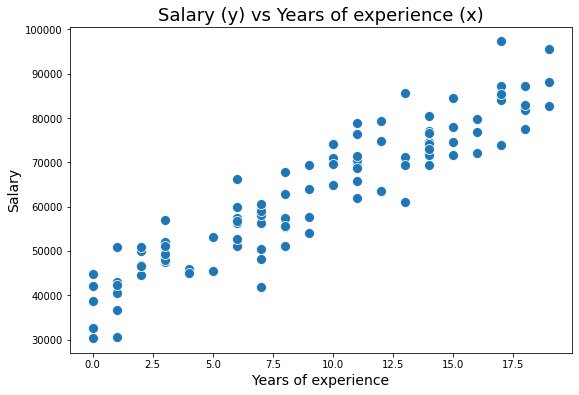

In [ ]:
plt.figure(figsize=(9, 6))
scatter = sns.scatterplot(x=x, y=y, s=100)

plt.title("Salary (y) vs Years of experience (x)", size=18)
plt.xlabel("Years of experience", size=14)
plt.ylabel("Salary", size=14)

plt.show()

Create the regression model (Find $\hat \beta_0$, $\hat \beta_1$ and $\hat \sigma$).

In [ ]:
N = len(y)
mean_x = np.mean(x)
mean_y = np.mean(y)
var_x = np.var(x)
cov_xy = (1 / (N-1)) * np.sum((x - mean_x) * (y - mean_y))

$\hat \beta_1 = \frac {s_{x,y}} {s^2_x}$

In [ ]:
beta_1_hat = cov_xy / var_x

$\hat \beta_0 = \overline y - \hat \beta_1 \overline x$

In [ ]:
beta_0_hat = mean_y - beta_1_hat * mean_x

$\hat \sigma = \sqrt {\frac 1 N \sum^N_{n=1} (y_n - \hat \beta_0 - \hat \beta_1 x)^2}$

In [ ]:
y_pred = beta_0_hat + beta_1_hat * x

sigma_square_hat = (1 / N) * np.sum((y - y_pred)**2)
sigma_hat = np.sqrt(sigma_square_hat)

In [ ]:
print("b0 = %.2f" % (beta_0_hat))
print("b1 = %.2f" % (beta_1_hat))
print("std = %.2f" % (sigma_hat))

b0 = 39498.89
b1 = 2566.14
std = 5711.22


Plot the resulting model.

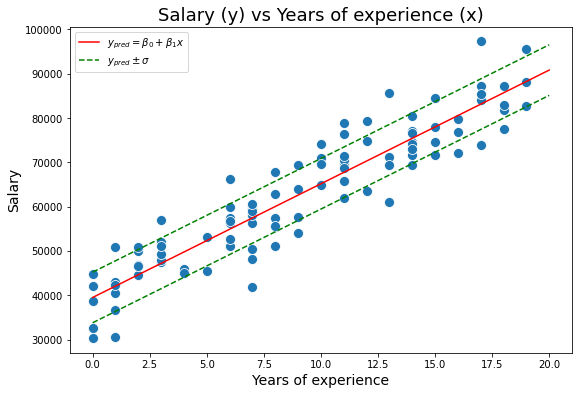

In [ ]:
plt.figure(figsize=(9, 6))
scatter = sns.scatterplot(x=x, y=y, s=100)

x_line = np.linspace(0, 20, 100)
y_line = beta_0_hat + beta_1_hat * x_line

sns.lineplot(x=x_line, y=y_line, color='red', label=r"$y_{pred} = \beta_0 + \beta_1 x$")
sns.lineplot(x=x_line, y=y_line + sigma_hat, linestyle='--', color='green', label=r"$y_{pred} \pm \sigma$")
sns.lineplot(x=x_line, y=y_line - sigma_hat, linestyle='--', color='green')

plt.title("Salary (y) vs Years of experience (x)", size=18)
plt.xlabel("Years of experience", size=14)
plt.ylabel("Salary", size=14)

plt.show()

Evaluate the goodness of fit.

$R^2$ score:

In [ ]:
r2_score = metrics.r2_score(y, y_pred)
print("R^2 score: %.3f" % (r2_score))

R^2 score: 0.857


Mean squared error:

In [ ]:
mse = metrics.mean_squared_error(y, y_pred)
print("Mean Squared Error: %.3f" % (mse))

Mean Squared Error: 32618063.356


Root mean squared error:

In [ ]:
rmse = np.sqrt(metrics.mean_squared_error(y, y_pred))
print("Root Mean Squared Error: %.3f" % (rmse))

Root Mean Squared Error: 5711.223


Residuals:

$\epsilon = y - y_{pred} = y - \hat \beta_0 + \hat \beta_1 x$

In [ ]:
residuals = y - y_pred

Residual mean $\mu_{\epsilon}$ and standard deviation $\sigma_{\epsilon}$:

In [ ]:
mean_e = np.mean(residuals)
std_e = np.std(residuals)
print("Residual mean and std: %.2f, %.2f" % (mean_e, std_e))

Residual mean and std: -0.00, 5711.22


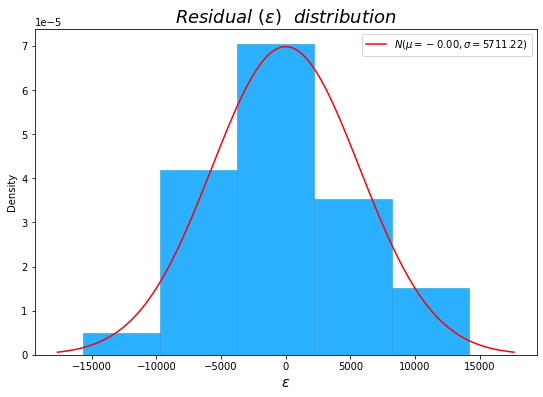

In [ ]:
plt.figure(figsize=(9, 6))

norm = stats.norm(loc=mean_e, scale=std_e)
x_line = np.linspace(norm.ppf(0.001), norm.ppf(0.999), 100)
sns.lineplot(x=x_line, y=norm.pdf(x_line), color='red', 
             label=r"$N(\mu=%.2f, \sigma=%.2f)$" % (mean_e, std_e))

sns.histplot(residuals, kde=False,  stat="density", bins=5, 
             facecolor = '#2ab0ff', edgecolor='#169acf', linewidth=0.5)

plt.title(r"$Residual \  (\epsilon) \ \  distribution$", size=18)
plt.xlabel(r"$\epsilon$", size=14)

plt.show()

Text(0, 0.5, 'Residuals')

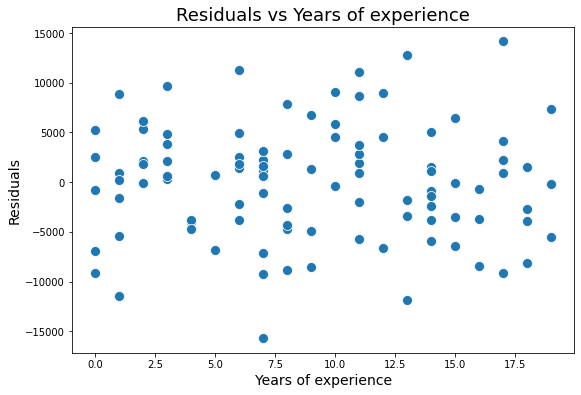

In [ ]:
plt.figure(figsize=(9, 6))
sns.scatterplot(x=x, y=residuals, s=100)

plt.title("Residuals vs Years of experience", size=18)
plt.xlabel("Years of experience", size=14)
plt.ylabel("Residuals", size=14)

Text(0, 0.5, 'Predicted salary')

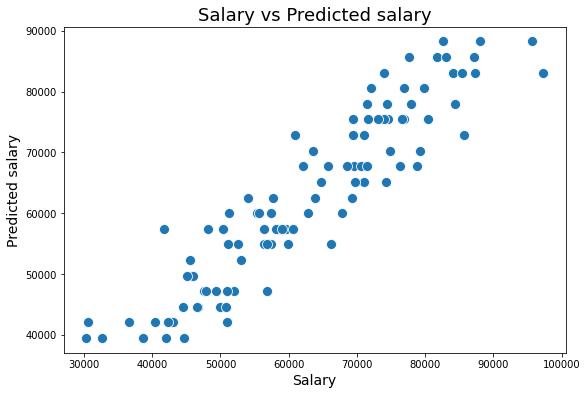

In [ ]:
plt.figure(figsize=(9, 6))
sns.scatterplot(x=y, y=y_pred, s=100)

plt.title("Salary vs Predicted salary", size=18)
plt.xlabel("Salary", size=14)
plt.ylabel("Predicted salary", size=14)

Text(0, 0.5, 'Sample Quantiles')

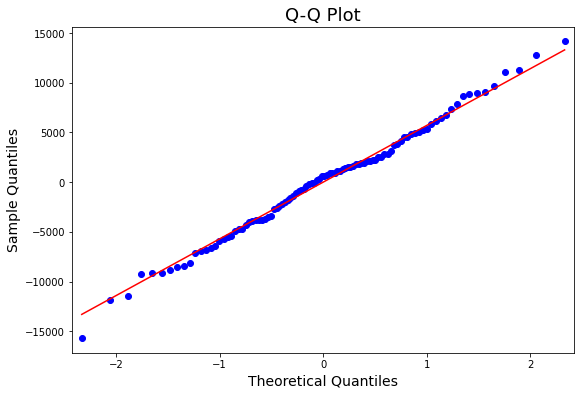

In [ ]:
fig = qqplot(residuals, line='s')
fig.set_size_inches(9, 6)
plt.title("Q-Q Plot", size=18)
plt.xlabel("Theoretical Quantiles", fontsize=14)
plt.ylabel("Sample Quantiles", fontsize=14)